In [1]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
fruits_dataset = pd.read_table('fruit_data_with_colors.txt')
fruits_dataset.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
# Defining X and Y from dataset
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits_dataset[feature_names]
y = fruits_dataset['fruit_label']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



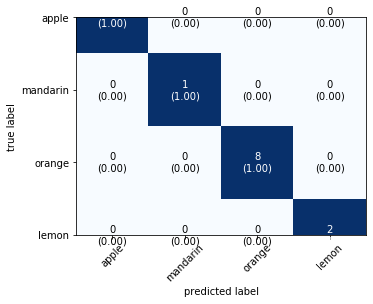

In [21]:
# Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,pred)
plot_confusion_matrix(conf_mat = cm, class_names = ["apple","mandarin","orange","lemon"] ,
                     show_normed = True,colorbar=False);
plt.show()

In [37]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#calculate roc_auc_score
y_pred_proba = knn.predict_proba(X_test)
ras=roc_auc_score(y_test, y_pred_proba, multi_class='') 
print (ras)

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(len(CLASS_NAMES)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Apple vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Mandarin vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Orange vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Lemon vs Rest')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


TypeError: roc_auc_score() got an unexpected keyword argument 'objective'